<a href="https://colab.research.google.com/github/SohumT/BoilerMart/blob/main/Copy_of_Pytorch_Workshop_Intro_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Reminder: Save your own copy first, do not directly running this Notebook**

#### Go to 'File'-> 'Save a Copy in Drive'

# Automatic Differentiation

In [ ]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # true output
w = torch.randn(5, 3, requires_grad=True) # parameter
b = torch.randn(3, requires_grad=True) # parameter
z = torch.matmul(x, w)+b # computed output
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y) # differences between z and y, i.e., loss function

print(x, y)
print(w, b, z)
print(loss)

tensor([1., 1., 1., 1., 1.]) tensor([0., 0., 0.])
tensor([[-0.9087,  0.9289, -0.0339],
        [-0.8214, -1.0104,  1.6073],
        [ 0.1678, -0.0578, -1.1245],
        [-1.1222,  0.3099,  1.3921],
        [ 0.0498,  0.7864, -0.1908]], requires_grad=True) tensor([-0.4721,  0.0621, -0.1748], requires_grad=True) tensor([-3.1067,  1.0192,  1.4752], grad_fn=<AddBackward0>)
tensor(1.0174, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


### Computing Gradients

To optimize weights of parameters in the neural network, we need to
compute the derivatives of our loss function with respect to parameters,
namely, we need $\frac{\partial loss}{\partial w}$ and
$\frac{\partial loss}{\partial b}$ under some fixed values of
``x`` and ``y``. To compute those derivatives, we call
``loss.backward()``, and then retrieve the values from ``w.grad`` and
``b.grad``:




In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0143, 0.2449, 0.2713],
        [0.0143, 0.2449, 0.2713],
        [0.0143, 0.2449, 0.2713],
        [0.0143, 0.2449, 0.2713],
        [0.0143, 0.2449, 0.2713]])
tensor([0.0143, 0.2449, 0.2713])


In [ ]:
print(w.shape)
print(b.shape)

torch.Size([5, 3])
torch.Size([3])


# Training Convolutional Neural Network on Hand-written Digits Dataset

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import MNIST

In [ ]:
## Create dataloader

# Define batch size, batch size is how much data you feed for training in one iteration
batch_size_train = 128 # We use a small batch size here for training
batch_size_test = 128 #

# define how image transformed
image_transform = torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])
#image datasets
train_dataset = torchvision.datasets.MNIST('dataset/',
                                           train=True,
                                           download=True,
                                           transform=image_transform)
test_dataset = torchvision.datasets.MNIST('dataset/',
                                          train=False,
                                          download=True,
                                          transform=image_transform)
#data loaders
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size_train,
                                           shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size_test,
                                          shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 138991094.84it/s]

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 104247585.05it/s]


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 44647747.22it/s]


Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20528587.03it/s]


Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



## Data Visualization

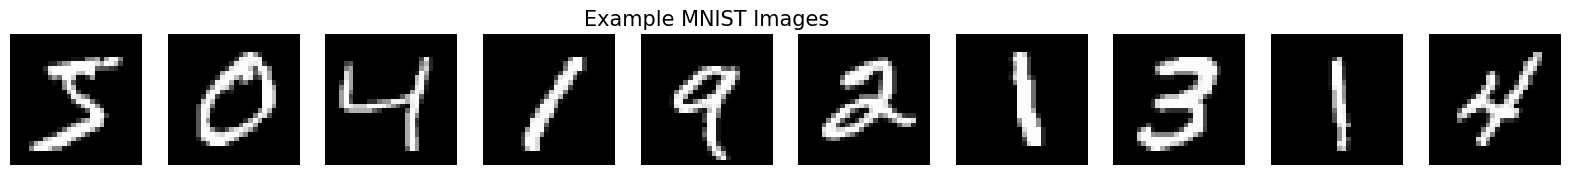

In [ ]:
## Data Visualization
images = train_dataset.data[:10]

plt.figure(figsize=(20,4))
for i in range(10):
  plt.subplot(1, 10, i+1)
  if i == 4:
    plt.title('Example MNIST Images', fontdict={'size': 15})
  plt.imshow(images[i].reshape(28, 28), cmap='gray')
  plt.axis('off')

## Build a MLP with 2 hidden layers

In [ ]:
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 10)

        self.relu = nn.ReLU()

    def forward(self, x):
        ## x \in [N=batch size, C=1, H=28, W=28] --> Flatten --> [N, 784]
        x = x.view(x.shape[0], -1)
        ## layer 1
        x = self.relu(self.fc1(x))

        ## layer 2
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
from torchsummary import summary
mlp = MLP()
mlp.cuda()
summary(mlp, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         401,920
              ReLU-2                  [-1, 512]               0
            Linear-3                  [-1, 256]         131,328
              ReLU-4                  [-1, 256]               0
            Linear-5                   [-1, 10]           2,570
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 2.04
Estimated Total Size (MB): 2.06
----------------------------------------------------------------


## Build Convolutional Neural Network

<!-- Network Structure: -->
<!--
  Convolution(1, 32, 3)->BatchNorm(32)->ReLU()  
  ->Max Pooling(2)  
  ->Convolution(32, 64, 3)->BatchNorm(64)->ReLU()  
  ->Max Pooling(2)  
  ->Convolution(64, 128, 3)->BatchNorm(128)->ReLU()  
  ->GlobalAveragePooling(7)  
  ->Linear(128, 64)->ReLU()  
  ->Dropout(0.5)  
  ->Linear(64, 10) -->

In [ ]:
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        self.maxpool = nn.MaxPool2d(2)
        self.relu = nn.ReLU()

        self.fc1 = nn.Linear(128*9, 10)

    def forward(self, x):
        ## x \in [N=batch size, C=1, H=28, W=28]
        ## Block 1
        x = self.relu(self.bn1(self.conv1(x))) #inner-most perform convolution -> then perform batch normalization then do relu activation
        x = self.maxpool(x)

        ## Block 2
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.maxpool(x)

        ## Block 3
        x = self.relu(self.bn3(self.conv3(x)))
        x = self.maxpool(x)

        ## x [B, C=128, H=3, W=3] -> view -> [B, 128*3*3]

        x = x.view(x.shape[0], -1)

        ## [B, D=128*3*3] -> [B, C=10]
        x = self.fc1(x)
        return x

In [ ]:
from torchsummary import summary
cnn = CNN()
cnn.cuda()
summary(cnn, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
       BatchNorm2d-2           [-1, 32, 28, 28]              64
              ReLU-3           [-1, 32, 28, 28]               0
         MaxPool2d-4           [-1, 32, 14, 14]               0
            Conv2d-5           [-1, 64, 14, 14]          18,496
       BatchNorm2d-6           [-1, 64, 14, 14]             128
              ReLU-7           [-1, 64, 14, 14]               0
         MaxPool2d-8             [-1, 64, 7, 7]               0
            Conv2d-9            [-1, 128, 7, 7]          73,856
      BatchNorm2d-10            [-1, 128, 7, 7]             256
             ReLU-11            [-1, 128, 7, 7]               0
        MaxPool2d-12            [-1, 128, 3, 3]               0
           Linear-13                   [-1, 10]          11,530
Total params: 104,650
Trainable params:

## Training and Testing

In [ ]:
##define train function
def train(model, train_loader, optimizer, epoch, log_interval=10000):
    tk0 = tqdm(train_loader, total=int(len(train_loader)))
    loss_epoch = 0
    correct = 0
    total = 0

    model.train()
    for batch_idx, (data, target) in enumerate(tk0):
        data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        output = model(data)
        correct += output.argmax(dim=1).eq(target).sum().item()
        total += target.shape[0]
        loss = Loss(output, target)
        loss.backward()
        optimizer.step()
        loss_epoch += loss
        tk0.set_postfix(loss=loss_epoch.item()/(batch_idx+1), Acc=correct/total*100.)

    return (loss_epoch / (batch_idx+1)),

##define test function
def test(model, test_loader):
    test_loss = 0
    correct = 0

    model.eval()
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.cuda(), target.cuda()
            output = model(data)
            test_loss += Loss(output, target)
            pred = output.argmax(dim=1)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= (len(test_loader.dataset)/batch_size_test)

    print('Testing, Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    return (100. * correct / len(test_loader.dataset))

In [ ]:
from tqdm import tqdm_notebook as tqdm

"""
  Please change these four hyper-parameters to see the results
  Note that decay steps should be smaller than total epochs
"""
learning_rate = 1e-3
weight_decay = 5e-4
total_epochs = 5
decay_steps = [3]

"""
  Choose Model you want to use:
  Convolutional Neural Network or Multi-Layer Perceptron
"""
model = cnn
# model = mlp

Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=decay_steps)


trn_losses = []
test_accs = []

for epoch in range(1, total_epochs + 1):
    print('Epoch: {}/{}'.format(epoch, total_epochs))
    trn_losses.append(train(model, train_loader, optimizer, epoch))
    test_accs.append(test(model, test_loader))
    lr_scheduler.step()

Epoch: 1/1


<ipython-input-11-5c7a0ab339f8>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tk0 = tqdm(train_loader, total=int(len(train_loader)))


  0%|          | 0/468 [00:00<?, ?it/s]

Testing, Average loss: 0.0358, Accuracy: 9888/10000 (98.88%)



## Prediction Illustration

In [ ]:
correct_imgs = []
wrong_imgs = []
wrong_preds = []
wrong_labels = []

model.eval()
with torch.no_grad():
    for img, label in test_dataset:
        img = img.cuda()
        output = model(img.unsqueeze(0))
        pred = output.argmax(dim=1)
        if pred.item() == label:
          correct_imgs.append(img.detach().cpu().numpy())
        else:
          wrong_imgs.append(img.detach().cpu().numpy())
          wrong_preds.append(pred.item())
          wrong_labels.append(label)

### Correctly predicted testing images

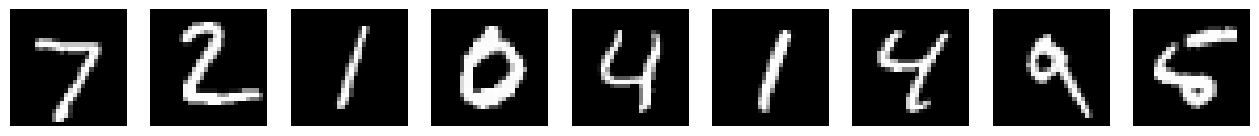

In [ ]:
plt.figure(figsize=(16, 4))
for i in range(9):
  plt.subplot(1, 9, i+1)
  plt.imshow(correct_imgs[i][0], cmap='gray')
  plt.axis('off')

### Wrongly predicted testing images

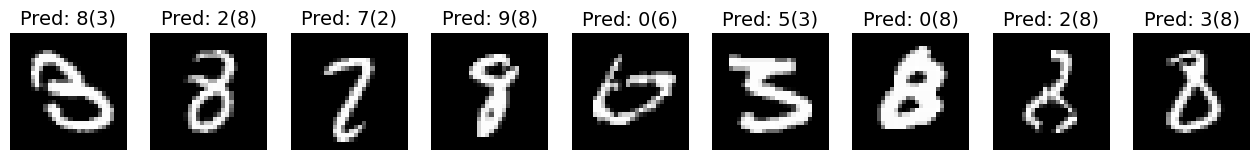

In [ ]:
plt.figure(figsize=(16, 4))
for i in range(9):
  plt.subplot(1, 9, i+1)
  plt.imshow(wrong_imgs[i][0], cmap='gray')
  plt.axis('off')
  plt.title('Pred: {}({})'.format(wrong_preds[i], wrong_labels[i]), fontdict={'size': 14})

## Filter Visualization For CNN

In [ ]:
filters1 = model.conv1.weight.detach().cpu().numpy()
filters2 = model.conv2.weight.detach().cpu().numpy()
print(filters1.shape)
print(filters2.shape)

(32, 1, 3, 3)
(64, 32, 3, 3)


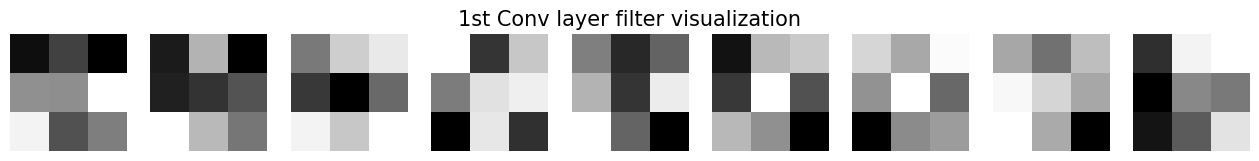

In [ ]:
plt.figure(figsize=(16, 4))
for i in range(9):
  plt.subplot(1, 9, i+1)
  plt.imshow(filters1[i].reshape(3, 3), cmap='gray')
  plt.axis('off')
  if i == 4:
    plt.title('1st Conv layer filter visualization', fontdict={'size': 15})

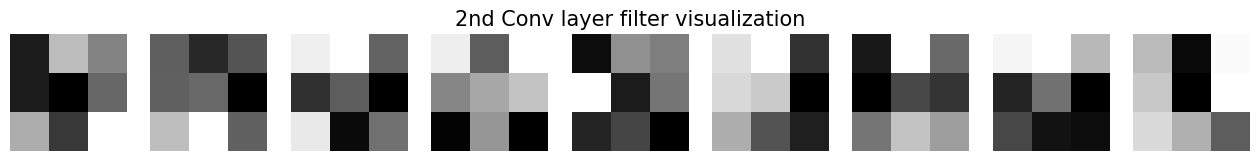

In [ ]:
plt.figure(figsize=(16, 4))
for i in range(9):
  plt.subplot(1, 9, i+1)
  plt.imshow(filters2[i, 0].reshape(3, 3), cmap='gray')
  plt.axis('off')
  if i == 4:
    plt.title('2nd Conv layer filter visualization', fontdict={'size': 15})